In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
from utils.xcs_utils import *

In [4]:
exploration_cycles = 1000
exploitation_cycles = 500
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ A $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 1
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = 0.000001               # p_I
algorithm.initial_error = 0.000001            # epsilon_I
algorithm.initial_fitness = 0.000001           # F_I
algorithm.wildcard_probability = 0.0

In [6]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=1,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment


In [7]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,50,42,44
100,16,377,1600
200,6,391,1600
300,2,406,1600
400,50,426,1600
500,50,444,1600
600,50,449,1600
700,2,468,1600
800,14,470,1600


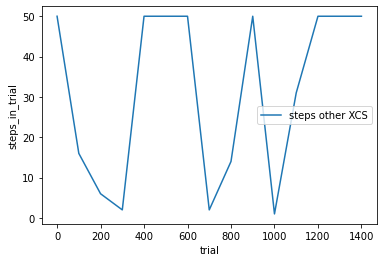

In [8]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

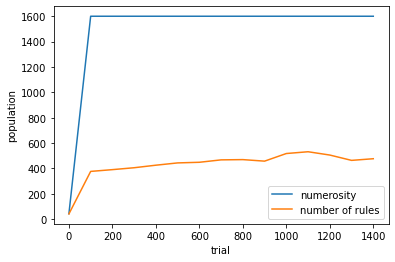

In [9]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [12]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 25,
                    metrics_trial_frequency=100,
                    mutation_chance=0.03,
                    chi=1,                           # crossover
                    initial_prediction = 0.000001,               # p_I
                    initial_error = 0.000001,            # epsilon_I
                    initial_fitness = 0.000001,           # F_I
                    user_metrics_collector_fcn=xcs_metrics)

In [13]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=1,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 4, 'reward': [0, 100.00000000000007, 0, 2.5205456210545373e-09, 0, 0, 0, 1.349e-13], 'perf_time': 0.0010627999999996973, 'population': 16, 'numerosity': 16}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 49, 'reward': [43.484988911585006, 155.8801151880337, 25.899420844188477, 27.394917025619986, 26.44408670571981, 25.766672900415497, 29.961322059865527, 29.01554115718213], 'perf_time': 0.027437300000087816, 'population': 212, 'numerosity': 422}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': [39.187000242492935, 33.6946701445112, 29.95530843292193, 31.015277518436182, 37.75189563350876, 51.031719648243865, 40.92758657756191, 37.92694442758516], 'perf_time': 0.03000869999993938, 'population': 215, 'numerosity': 514}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': [135.8813424010642, 54.62575901289569, 38.02975863106683, 53.93782200756955, 43.89146734206789, 78.60386221284136, 52.21542181564877, 54.56380856282243], 'perf_time': 0.02858409999998912, 'population': 215, 'numerosity': 534}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [11.028770725424632, 8.036558896840486

In [14]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,4,0.001063,16,16
100,49,0.027437,212,422
200,50,0.030009,215,514
300,50,0.028584,215,534
400,50,0.027829,215,574
500,50,0.028523,215,574
600,50,0.027707,215,574
700,29,0.015213,215,574
800,21,0.010864,215,574


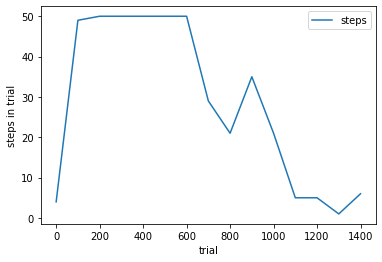

In [15]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


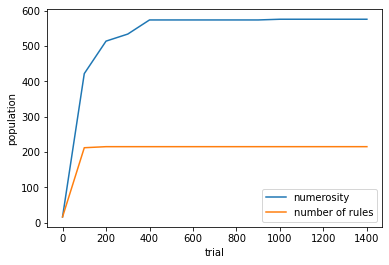

In [16]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.